# Sentiment Analysis
## Pada section ini akan dilakukan sentiment analysis menggunakan library textblob. Step yang akan dilakukan :

1. Load corpus dari review bakso
2. Translating ke bahasa inggris (karena textblob hanya support bahasa inggris)
3. Perhitungan sentimen
4. Penyajian Data

In [3]:
# Load previous corpus
import pandas as pd

corpus = pd.read_pickle('corpus.pkl')
corpus

,reviews,full_name
pahlawan_trip,kalo ke kota malang pasti salah satu makanan y...,Bakso Bakar Pahlawan Trip
pak_man,malang identik dengan bakso nya dan ini adalah...,Bakso Bakar Pak Man
trowulan,perbiji rupiah pilihan bakso bakar rasa manis ...,Bakso Trowulan
damas,ini untuk kedua kalinya makan di tempat ini pe...,Bakso Damas
gun,saya mencoba bakso gun di matos malang kita bi...,Bakso Gun
cak_man,cita rasa yg khas dan penyajiannya yg masih or...,Bakso Kota Cak Man
samut,rumah makan ini berada di sebuah ruko di kawas...,Bakso Pak Samut
presiden,salah satu tujuan kuliner legendaris di kota m...,Bakso Presiden


In [4]:
# translating reviews
from googletrans import Translator

for i, review in enumerate(corpus.reviews):
    translator = Translator()
    translation = translator.translate(review, src='id', dest='en')
    corpus.reviews[i] = translation.text
    
# pickle engllish corpus for later use
corpus.to_pickle("english_corpus.pkl")

corpus = pd.read_pickle('english_corpus.pkl')
corpus

,reviews,full_name
pahlawan_trip,reply to a poor town definitely one of the foo...,Bakso Bakar Pahlawan Trip
pak_man,unfortunate synonymous with meatballs her and ...,Bakso Bakar Pak Man
trowulan,perbiji rupiah selection of grilled meatballs ...,Bakso Trowulan
damas,The second time eating at this place first mea...,Bakso Damas
gun,I tried the meatballs gun in matos unfortunate...,Bakso Gun
cak_man,taste distinctive and presentation that is sti...,Bakso Kota Cak Man
samut,this restaurant is in a shop in a residential ...,Bakso Pak Samut
presiden,one culinary destination legendary in Malang i...,Bakso Presiden


## Sentiment calculation (Overall Sentiment)

In [17]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data = corpus
data['polarity'] = data['reviews'].apply(pol)
data['subjectivity'] = data['reviews'].apply(sub)
data

,reviews,full_name,polarity,subjectivity
pahlawan_trip,reply to a poor town definitely one of the foo...,Bakso Bakar Pahlawan Trip,0.064155,0.563534
pak_man,unfortunate synonymous with meatballs her and ...,Bakso Bakar Pak Man,0.077079,0.530855
trowulan,perbiji rupiah selection of grilled meatballs ...,Bakso Trowulan,0.122516,0.566308
damas,The second time eating at this place first mea...,Bakso Damas,0.154155,0.580987
gun,I tried the meatballs gun in matos unfortunate...,Bakso Gun,0.156869,0.644042
cak_man,taste distinctive and presentation that is sti...,Bakso Kota Cak Man,0.158203,0.596089
samut,this restaurant is in a shop in a residential ...,Bakso Pak Samut,0.132496,0.553233
presiden,one culinary destination legendary in Malang i...,Bakso Presiden,0.110756,0.552734


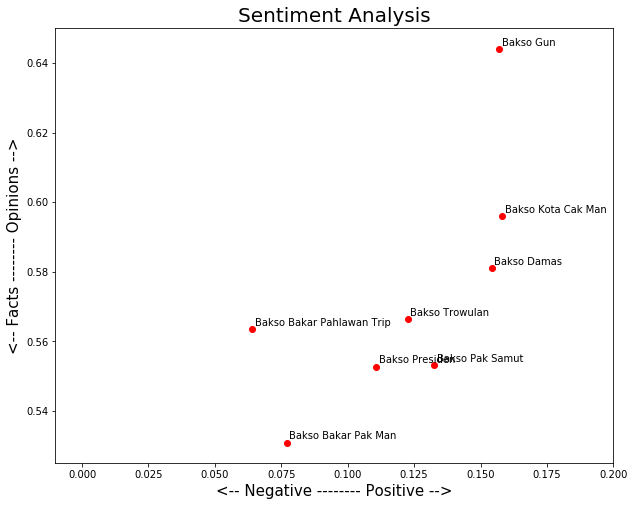

In [21]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, place in enumerate(data.index):
    x = data.polarity.loc[place]
    y = data.subjectivity.loc[place]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)    
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment Calculation (per-n chunks of reviews)

In [41]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.reviews:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['reply to a poor town definitely one of the foods to be searched is the meatballs are many kinds of meatballs today presented no meatballs cheese meatballs uric meatballs mushrooms and of course grilled meatballs but there is only one place that sells grilled meatballs at night ie grilled meatball hero trip apart meatballs this place also provides other menu suggestions for eating grilled meatballs not more hehehehe first impression got meatball sta',
  'll it was surprised that its premises are spacious and clean menu meatballs offered relatively many of the most recomeneded grilled meatballs spicy it tasted sweet spicy enough to make nagih gak nyesel was pokoke ane will be stopping here again if fitting to poor eating places visited by many artists but tastes mediocre and the service less than satisfactory I waited a long time for a serving of chicken noodle but for fellow traveler who want to fi',
  'nd foods that are not too heavy this place could be an option for in downtown to 

In [42]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
# polarity_transcript

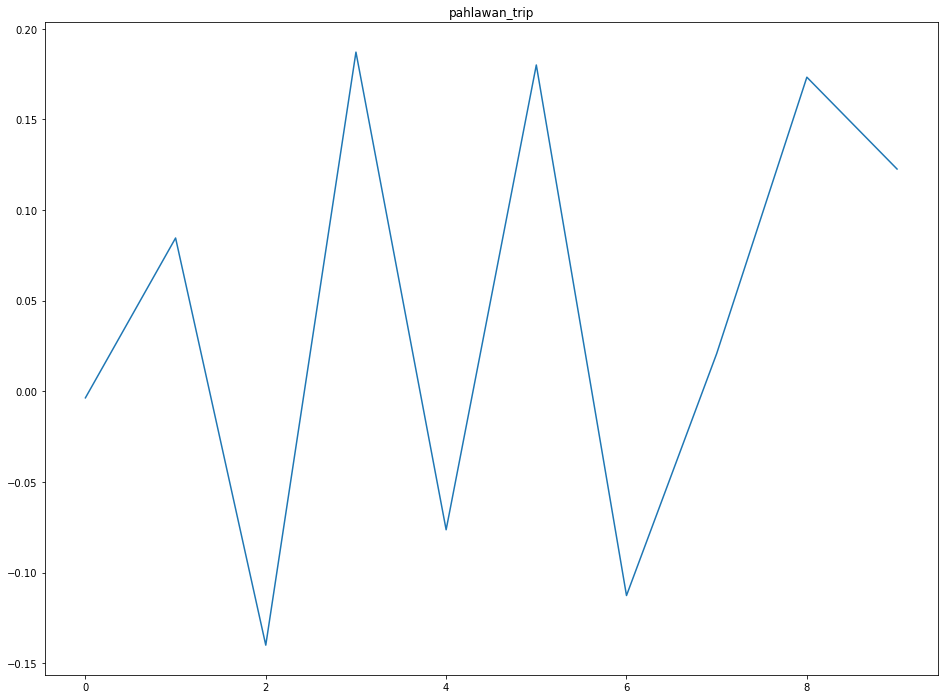

In [43]:
# Show the plot for one places
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

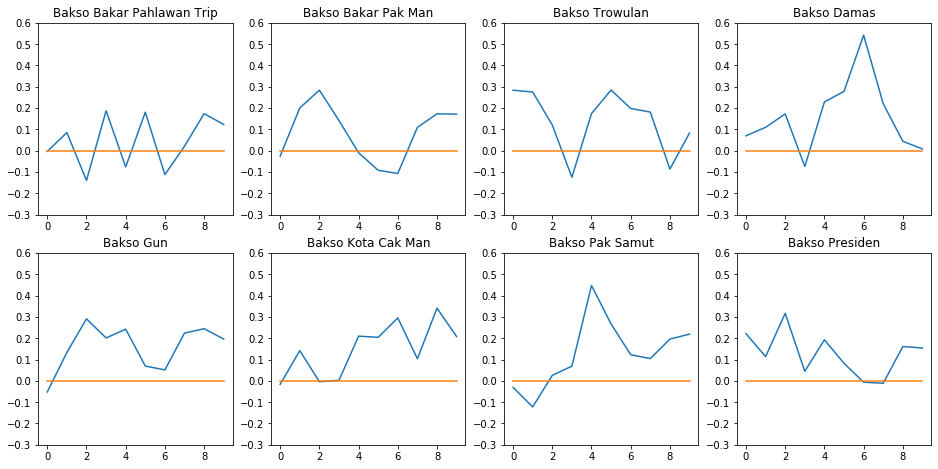

In [45]:
# Show the plot for all places
plt.rcParams['figure.figsize'] = [16, 12]

for index, place in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.3, ymax=.6)
    
plt.show()

## Summary
1. Sentimen secara keseluruhan terhadap warung-warung bakso yang ada di Malang adalah positif
2. Bakso Gun mempunyai nilai sentimen positif terbaik, sedangkan yang paling sedikit adalah bakso pahlawan trip
3. Pada plot sentiment yang dibagi menjadi potongan review, bakso kota cak man dan bakso presiden paling sedikit mendapatkan sentimen negatif